In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer

# sklearn libraries
from sklearn.pipeline                import Pipeline
from sklearn.linear_model            import LogisticRegression
from sklearn.naive_bayes             import MultinomialNB
from sklearn.ensemble                import RandomForestClassifier
from sklearn.model_selection         import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df1 =pd.read_csv('data/nfl.csv')
df2 =pd.read_csv('data/ncaa.csv')

In [3]:
df1.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,subreddit_subscribers,created_utc,num_crossposts,media,is_video,url_overridden_by_dest,call_to_action,author_cakeday,link_flair_template_id,media_metadata
0,NaN,nfl,[Cincinnati Bengals](/r/bengals#away) [at](#at...,t2_plq2w,False,NaN,0,False,Post Game Thread: Cincinnati Bengals (2-3) at ...,"[{'e': 'text', 't': 'Post Game Thread'}]",...,3015663,1.665372e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
1,NaN,nfl,[Cincinnati Bengals](/r/bengals#away) [at](#at...,t2_plq2w,False,NaN,0,False,Game Thread: Cincinnati Bengals (2-2) at Balti...,"[{'e': 'text', 't': 'Game Thread'}]",...,3015663,1.665359e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
2,NaN,nfl,NaN,t2_gbzf7q,False,NaN,0,False,[Highlight] Cardinals miss the field goal and ...,"[{'e': 'text', 't': 'Highlight'}]",...,3015663,1.665358e+09,0,{'oembed': {'provider_url': 'https://twitter.c...,False,https://twitter.com/lowlightheaven/status/1579...,NaN,NaN,NaN,NaN
3,NaN,nfl,NaN,t2_s82n19zx,False,NaN,0,False,[Highlight] Roughing the passer called. Stunning.,[],...,3015663,1.665346e+09,1,{'oembed': {'provider_url': 'https://twitter.c...,False,https://twitter.com/MentionPod/status/15792005...,NaN,NaN,NaN,NaN
4,NaN,nfl,NaN,t2_gbzf7q,False,NaN,0,False,[Stat Muse] Cooper Rush is 5-0 as a starter. O...,[],...,3015663,1.665358e+09,0,{'oembed': {'provider_url': 'https://twitter.c...,False,https://twitter.com/statmuse/status/1579250511...,NaN,NaN,NaN,NaN


In [4]:
df2.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,media,is_video,call_to_action,crosspost_parent_list,crosspost_parent,poll_data,author_cakeday,is_gallery,media_metadata,gallery_data
0,NaN,NCAA,NaN,t2_dz9aci0e,False,NaN,0,False,Mental Health Advisory Group to meet for first...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NCAA,NaN,t2_rnqvk,False,NaN,0,False,Early favorite emerges in Wisconsin Badgers He...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NCAA,"As promised, as i already did NCAA 2K's for ol...",t2_22akoaxt,False,NaN,0,False,NCAA 2K23 - how to download and install! ENJOY!,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NCAA,anthroscopic* \n\nI'm hoping to hear from athl...,t2_9ku39crx,False,NaN,0,False,Does arthroscopic surgery for a shoulder injur...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NCAA,NaN,t2_gohw27kc,False,NaN,0,False,Air Force football program put on probation by...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2.shape

(976, 113)

In [6]:
# append two dataframe into one for data training
df = pd.concat([df1, df2], axis=0)
df = df.reset_index(drop=True)
df.shape

(1977, 114)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Columns: 114 entries, approved_at_utc to gallery_data
dtypes: bool(28), float64(24), int64(10), object(52)
memory usage: 1.4+ MB


In [8]:
df.subreddit.value_counts()

nfl     1001
NCAA     976
Name: subreddit, dtype: int64

In [9]:
#rename column
df.rename(columns = {'subreddit':'is_nfl'}, inplace = True)
# Create label column
df['is_nfl'] = df['is_nfl'].map({'NCAA':0, 'nfl':1})

In [10]:
df.is_nfl.value_counts()

1    1001
0     976
Name: is_nfl, dtype: int64

In [11]:
df = df[['is_nfl','author_fullname','title']].copy()

In [12]:
df.shape

(1977, 3)

In [13]:
df.isnull().sum()

is_nfl              0
author_fullname    32
title               0
dtype: int64

In [14]:
df.dropna(axis =0, inplace=True)
df.isnull().sum().sum()

0

In [15]:
df.shape

(1945, 3)

In [16]:
df.drop_duplicates(subset='title', keep='first', inplace=True, ignore_index=True)

In [17]:
df.shape

(1582, 3)

#### Lower casing

In [18]:
def lower_case(df):
    df['title'] = df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    print(df['title'].head())

In [19]:
lower_case(df)

0    post game thread: cincinnati bengals (2-3) at ...
1    game thread: cincinnati bengals (2-2) at balti...
2    [highlight] cardinals miss the field goal and ...
3    [highlight] roughing the passer called. stunning.
4    [stat muse] cooper rush is 5-0 as a starter. o...
Name: title, dtype: object


#### remove punctuation

In [20]:
def punctuation_removal(df):
    df['title'] = df['title'].str.replace('[^\w\s]','')
    print(df['title'].head())

In [21]:
punctuation_removal(df)

0    post game thread cincinnati bengals 23 at balt...
1    game thread cincinnati bengals 22 at baltimore...
2    highlight cardinals miss the field goal and ea...
3        highlight roughing the passer called stunning
4    stat muse cooper rush is 50 as a starter only ...
Name: title, dtype: object


C:\Users\science01\AppData\Local\Temp\ipykernel_25336\827688525.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('[^\w\s]','')


### Exploring most common words

In [22]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words='english')
# Fit and transform the vectorizer on our corpus.
df_cvec= cvec.fit_transform(df['title'])
#putting results into dataframe
df_cvec = pd.DataFrame(df_cvec.todense(), columns=cvec.get_feature_names_out())

In [23]:
df_cvec

,00,02,0200,021,031,04,07,0for4,0for6,10,...,zadarius,zaga,zaire,zappe,zero,zhao,zone,zoo,zoom,zrebiec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_cvec_series = pd.Series(df_cvec.sum())
df_cvec_series 

00          2
02          1
0200        1
021         1
031         1
           ..
zhao        1
zone       10
zoo         1
zoom        1
zrebiec     2
Length: 4677, dtype: int64

In [25]:
df1_cvec= cvec.fit_transform(df1['title'])
df1_cvec = pd.DataFrame(df1_cvec.todense(), columns=cvec.get_feature_names_out())

In [26]:
df2_cvec= cvec.fit_transform(df2['title'])
df2_cvec = pd.DataFrame(df2_cvec.todense(), columns=cvec.get_feature_names_out())

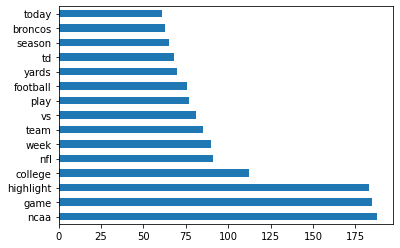

In [27]:
#Most common words
df_cvec.sum().sort_values(ascending =False).head(15).plot.barh();

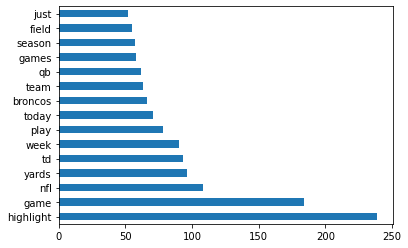

In [28]:
#Most common words in nfl subreddit
df1_cvec.sum().sort_values(ascending =False).head(15).plot.barh();

In [29]:
freq1 = pd.Series(df1_cvec.sum().sort_values(ascending =False)[:10])

In [30]:
freq1

highlight    239
game         184
nfl          108
yards         96
td            93
week          90
play          78
today         71
broncos       66
team          63
dtype: int64

In [31]:
freq1 = list(freq1.index)
freq1 

['highlight',
 'game',
 'nfl',
 'yards',
 'td',
 'week',
 'play',
 'today',
 'broncos',
 'team']

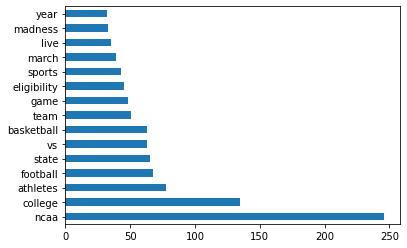

In [35]:
#Most common words in ncaa subreddit
df2_cvec.sum().sort_values(ascending =False).head(15).plot.barh();

In [36]:
freq2 = pd.Series(df2_cvec.sum().sort_values(ascending =False)[:10])
freq2 

ncaa           246
college        135
athletes        78
football        68
state           65
vs              63
basketball      63
team            51
game            48
eligibility     45
dtype: int64

In [37]:
freq2 = list(freq2.index)
freq2 

['ncaa',
 'college',
 'athletes',
 'football',
 'state',
 'vs',
 'basketball',
 'team',
 'game',
 'eligibility']

In [41]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words='english')
# Fit and transform the vectorizer on our corpus.
df_cvec= cvec.fit_transform(df['title'])
#putting results into dataframe
df_cvec = pd.DataFrame(df_cvec.todense(), columns=cvec.get_feature_names_out())

### Explore title length

In [44]:
#a new column called title_length that contains the length of each status
df['title_length'] = df['title'].str.len()

In [45]:
#a new column called title_word_count that contains the number of words in each status
# Instantiate RegExp Tokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['title_word_count'] = df['title'].str.lower().apply(lambda x: len(tokenizer.tokenize(x)))

In [46]:
#  a new column called title_ave_length that contains the sum of the length of all the words and divide it by the total length of the status
df['title_ave_length'] = df['title_word_count']/df['title_length']
df.describe().round(2)

,is_nfl,title_length,title_word_count,title_ave_length
count,1582.00,1582.00,1582.00,1582.00
mean,0.52,84.13,14.91,0.17
std,0.50,63.77,11.85,0.03
min,0.00,3.00,1.00,0.02
25%,0.00,40.25,7.00,0.16
50%,1.00,64.00,11.00,0.18
75%,1.00,103.00,19.00,0.19
max,1.00,298.00,58.00,0.33


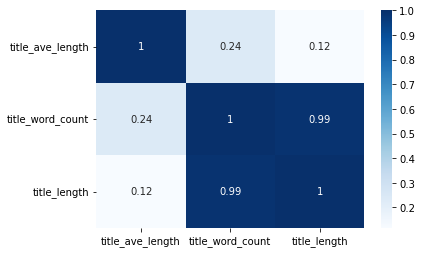

In [47]:
#correlation matrix of 'title_ave_length' 'title_word_count' 'title_length'
df_word = df[['title_ave_length','title_word_count','title_length']].copy()
corr = df_word.corr()
sns.heatmap(corr, cmap="Blues", annot=True);

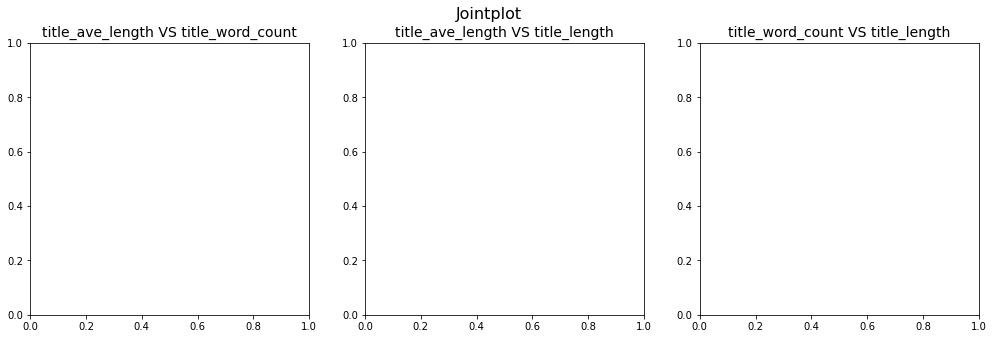

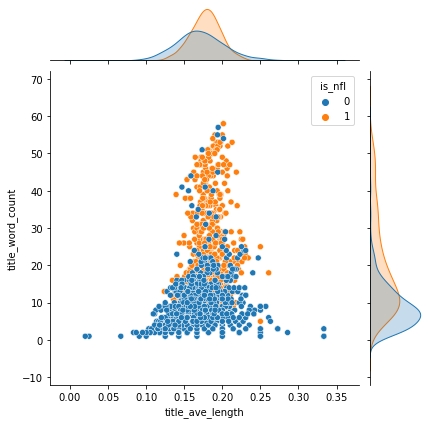

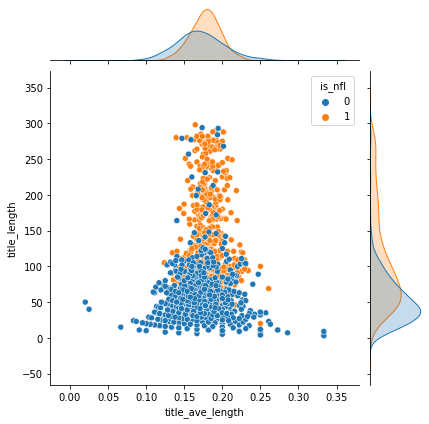

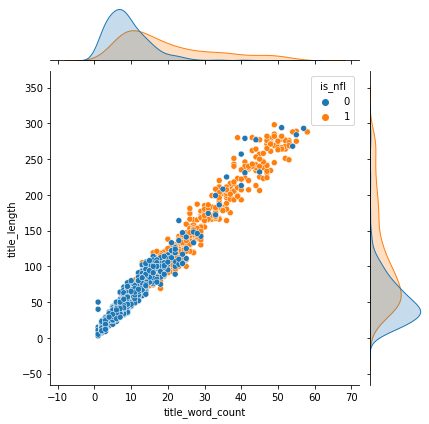

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,5))
ax = ax.ravel() 

fig.suptitle("Jointplot", fontsize=16)
ax[0].set_title('title_ave_length VS title_word_count', fontsize =14)
sns.jointplot(ax=ax[0], data=df, x='title_ave_length', y='title_word_count', hue='is_nfl')

ax[1].set_title('title_ave_length VS title_length', fontsize =14)
sns.jointplot(ax=ax[1], data=df, x='title_ave_length', y='title_length', hue='is_nfl')

ax[2].set_title('title_word_count VS title_length', fontsize =14)
sns.jointplot(ax=ax[2], data=df, x='title_word_count', y='title_length', hue='is_nfl')

plt.show()


In [49]:
#df.groupby(['is_nfl'])['title_length','title_word_count','title_ave_length'].agg(['mean']).round(2)
df.groupby(['is_nfl']).agg(['mean']).round(2)

C:\Users\science01\AppData\Local\Temp\ipykernel_25336\3634890726.py:2: FutureWarning: ['author_fullname', 'title'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['is_nfl']).agg(['mean']).round(2)


,title_length,title_word_count,title_ave_length
,mean,mean,mean
is_nfl,,,
0,55.33,9.47,0.17
1,110.90,19.96,0.18


### Exploring authors


In [50]:
df['author_fullname'].nunique()

966

In [51]:
df.shape

(1582, 6)

In [52]:
df1.shape

(1001, 109)

In [53]:
df2.shape

(976, 113)

## Developing baseline model (Using Logistic Regression)

#### Classification numbers of word count using Logistic Regression

In [54]:
# Set X and y
X = df[['title_word_count']]
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)


In [55]:
logreg =LogisticRegression()
logreg.fit(X_train, y_train)
logreg.predict(X_test)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient(s): {logreg.coef_}')
print(f'Testing accuracry: {logreg.score(X_test, y_test)}')

Logistic Regression Intercept: [-1.59947238]
Logistic Regression Coefficient(s): [[0.12614997]]
Testing accuracry: 0.6624605678233438


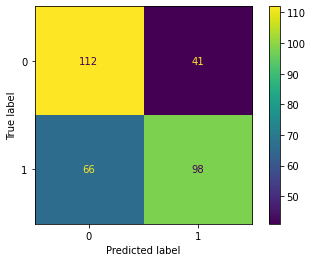

In [56]:
y_preds_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test, y_preds_logreg)
ConfusionMatrixDisplay(confusion_matrix=cm_logreg).plot();

### Classification title post from text using Logistic Regression

In [57]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [58]:
X_train

1443    your bracket either dies first round or lives ...
1097    repost graduate student survey  studentathlete...
775     pelissero attorneys for the commanders sent a ...
431     nflpa president tretter we do not believe this...
1426    can someone find me a free reddit link to the ...
                              ...                        
503     jennaharner11 the colts and broncos have combi...
1558    fsu coach jimbo fisher cuts media interview sh...
1125                                         drug testing
1399    xfl ceo oliver luck to headline njcaas its fir...
161                        highlight burrow is picked off
Name: title, Length: 1265, dtype: object

In [59]:
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
X_train

1443    your bracket either dies first round or lives ...
1097    repost graduate student survey studentathletes...
775     pelissero attorneys for the commanders sent a ...
431     nflpa president tretter we do not believe this...
1426    can someone find me a free reddit link to the ...
                              ...                        
503     jennaharner11 the colts and have combined for ...
1558    fsu coach jimbo fisher cuts media interview sh...
1125                                         drug testing
1399    xfl ceo oliver luck to headline njcaas its fir...
161                                  burrow is picked off
Name: title, Length: 1265, dtype: object

In [60]:
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
X_train

1443    your bracket either dies first round or lives ...
1097    repost graduate student survey studentathletes...
775     pelissero attorneys for the commanders sent a ...
431     nflpa president tretter we do not believe this...
1426    can someone find me a free reddit link to the ...
                              ...                        
503     jennaharner11 the colts and have combined for ...
1558    fsu coach jimbo fisher cuts media interview sh...
1125                                         drug testing
1399    xfl ceo oliver luck to headline njcaas its fir...
161                                  burrow is picked off
Name: title, Length: 1265, dtype: object

In [61]:
# Gridsearch Vectorizer with Logistic Regression
pipe1 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe1_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid1 = GridSearchCV(pipe1,pipe1_params,cv=5)
grid1.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid1.best_score_}')
print(f'Best params:{grid1.best_params_}')
print('')                                       
# ==========================================================================
pipe2 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe2_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid2 = GridSearchCV(pipe2,pipe2_params,cv=5)
grid2.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid2.best_score_}')
print(f'Best params:{grid2.best_params_}')
print('')

CountVectorizer+LogisticRegression: 0.800790513833992
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}

TfidVectorizer+LogisticRegression:  0.7976284584980238
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 1), 'tv__stop_words': 'english'}



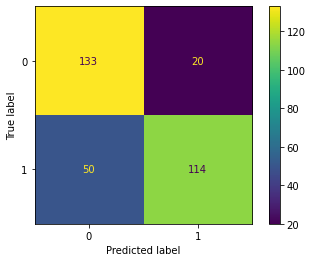

In [62]:
y_preds_grid1 = grid1.predict(X_test)
cm_grid1 = confusion_matrix(y_test, y_preds_grid1)
ConfusionMatrixDisplay(confusion_matrix=cm_grid1).plot();

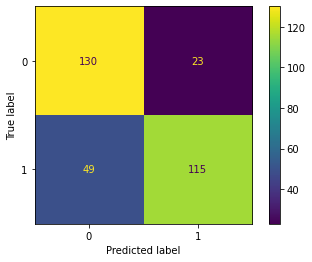

In [63]:
y_preds_grid2 = grid2.predict(X_test)
cm_grid2 = confusion_matrix(y_test, y_preds_grid2)
ConfusionMatrixDisplay(confusion_matrix=cm_grid2).plot();

### Stemmatization before vectorization

In [64]:
from nltk.stem import PorterStemmer
st = PorterStemmer()


In [65]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)
X_train= X_train.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

1443    your bracket either die first round or live al...
1097    repost graduat student survey studentathlet an...
775     pelissero attorney for the command sent a lett...
431     nflpa presid tretter we do not believ thi wa a...
1426    can someon find me a free reddit link to the t...
                              ...                        
503     jennaharner11 the colt and have combin for 17 ...
1558    fsu coach jimbo fisher cut media interview sho...
1125                                            drug test
1399    xfl ceo oliv luck to headlin njcaa it firstev ...
161                                    burrow is pick off
Name: title, Length: 1265, dtype: object

In [66]:
# Gridsearch Vectorizer with Logistic Regression
pipe3 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe3_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid3 = GridSearchCV(pipe3,pipe3_params,cv=5)
grid3.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid3.best_score_}')
print(f'Best params:{grid3.best_params_}')
print('')                                       
# ==========================================================================
pipe4 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe4_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid4 = GridSearchCV(pipe4,pipe4_params,cv=5)
grid4.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid4.best_score_}')
print(f'Best params:{grid4.best_params_}')
print('')

CountVectorizer+LogisticRegression: 0.8189723320158102
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}

TfidVectorizer+LogisticRegression:  0.8229249011857707
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 1), 'tv__stop_words': 'english'}



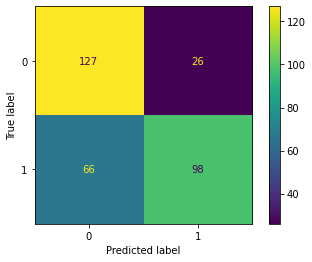

In [67]:
y_preds_grid3 = grid3.predict(X_test)
cm_grid3 = confusion_matrix(y_test, y_preds_grid3)
ConfusionMatrixDisplay(confusion_matrix=cm_grid3).plot();

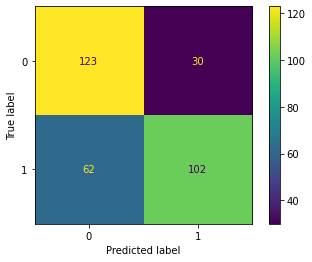

In [68]:
y_preds_grid4 = grid4.predict(X_test)
cm_grid4 = confusion_matrix(y_test, y_preds_grid4)
ConfusionMatrixDisplay(confusion_matrix=cm_grid4).plot();

### Lemmatization 

In [70]:
from textblob import Word
#def lemmatization(df):
#     return df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [71]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
X_train = X_train.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
#df_lemm.head()

In [ ]:
# Set X and y
#X = df_lemm['title']
#y = df_lemm['is_nfl']
# Train (80%) Test (20%) split 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
#                                                    random_state=42,
 #                                                   stratify=y)

In [72]:
#Gridsearch Vectorizer with Logistic Regression
pipe5 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe5_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid5 = GridSearchCV(pipe5,pipe5_params,cv=5)
grid5.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid5.best_score_}')
print(f'Best params:{grid5.best_params_}')
print('')                                       
# ==========================================================================
pipe6 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe6_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid6 = GridSearchCV(pipe6,pipe6_params,cv=5)
grid6.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid6.best_score_}')
print(f'Best params:{grid6.best_params_}')
print('')

CountVectorizer+LogisticRegression: 0.8181818181818181
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}

TfidVectorizer+LogisticRegression:  0.8181818181818181
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 1), 'tv__stop_words': 'english'}



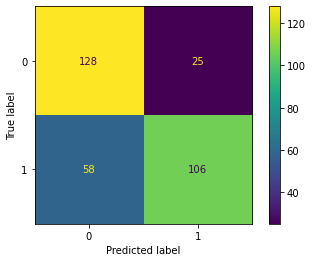

In [73]:
y_preds_grid5 = grid5.predict(X_test)
cm_grid5 = confusion_matrix(y_test, y_preds_grid5)
ConfusionMatrixDisplay(confusion_matrix=cm_grid5).plot();

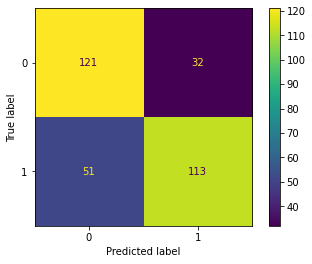

In [74]:
y_preds_grid6 = grid6.predict(X_test)
cm_grid6 = confusion_matrix(y_test, y_preds_grid6)
ConfusionMatrixDisplay(confusion_matrix=cm_grid6).plot();

### Stem and Lemmatize

In [75]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
X_train = X_train.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
X_train = X_train.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [76]:
#Gridsearch Vectorizer with Logistic Regression
pipe7 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe7_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid7 = GridSearchCV(pipe5,pipe5_params,cv=5)
grid7.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid7.best_score_}')
print(f'Best params:{grid7.best_params_}')
print('')                                       
# ==========================================================================
pipe8 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe8_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid8 = GridSearchCV(pipe8,pipe8_params,cv=5)
grid8.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid8.best_score_}')
print(f'Best params:{grid8.best_params_}')
print('')

CountVectorizer+LogisticRegression: 0.817391304347826
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 2), 'cv__stop_words': 'english'}

TfidVectorizer+LogisticRegression:  0.8205533596837945
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 1), 'tv__stop_words': 'english'}



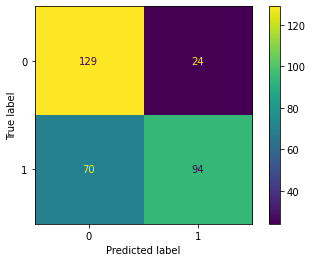

In [77]:
y_preds_grid7 = grid7.predict(X_test)
cm_grid7 = confusion_matrix(y_test, y_preds_grid7)
ConfusionMatrixDisplay(confusion_matrix=cm_grid7).plot();

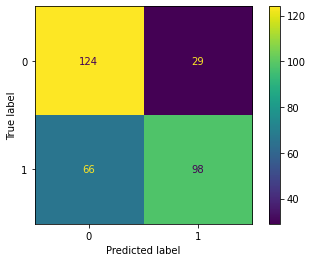

In [78]:
y_preds_grid8 = grid8.predict(X_test)
cm_grid8 = confusion_matrix(y_test, y_preds_grid8)
ConfusionMatrixDisplay(confusion_matrix=cm_grid8).plot();

### number of word and bag of word

In [92]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.feature_extraction import DictVectorizer
import pandas as pd
import re

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


df['title_tokens'] = df.title.apply(word_tokenize)

In [96]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

#train = train.apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
#train = train.apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
#train = train.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
#train = train.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print(train.shape)
print(test.shape)

(1265, 7)
(317, 7)


In [97]:
def featurize_unigram(tokens:list):
    feat_dic = {}
    for i, token in enumerate(tokens):
        ## add unigram
        feat_dic[token] = 1
        ## add text length
        feat_dic['LENGTH'] = len(tokens)
    return feat_dic

def featurize_bigram(tokens:list):
    feat_dic = {}
    for i, token in enumerate(tokens):
        ## add unigram
        feat_dic[token] = 1
        ## add bigram
        if i < len(tokens) - 1:
            bigram = '|'.join(tokens[i:i+2]) # e.g. ฉัน|ไป
            feat_dic[bigram] = 1
        ## add text length
        feat_dic['text_length'] = len(tokens)
    return feat_dic

In [99]:
from dis import dis
from matplotlib.pyplot import cla


def train_predict(X_column_name, featurize_function_name, show_confusion_matrix=False, return_model=False):
    ## make X : featurize each record as dictionary
    X_train = train[X_column_name].apply(featurize_function_name)
    X_test = test[X_column_name].apply(featurize_function_name)

    ## make y
    y_train = train['is_nfl']
    y_test = test['is_nfl']

    ## Instantiate DictVectorizer, LogisticRegression
    pipe = Pipeline([
        ('dv', DictVectorizer(sparse=True)),  ## feature dictionary -> vector
        ('logreg', LogisticRegression(max_iter=200))
    ])

    pipe.fit(X_train, y_train) # train
    y_pred = pipe.predict(X_test) # predict
    class_name = pipe.named_steps['logreg'].classes_ # name of labels

    print(classification_report(y_test, y_pred))

    # print confusion matrix
    if show_confusion_matrix:
        cm = confusion_matrix(y_test, y_pred, labels=class_name)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)
        disp.plot(xticks_rotation=80)

    # return model
    if return_model:
        return pipe

In [100]:
train_predict('title', featurize_unigram)

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       139
           1       0.77      0.79      0.78       178

    accuracy                           0.75       317
   macro avg       0.75      0.75      0.75       317
weighted avg       0.75      0.75      0.75       317



C:\Users\science01\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Building alternative models

In [84]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq2))


In [85]:
# CountVectorizer with NaiveBayes, and RandomForest
pipe9 = Pipeline([('cv', CountVectorizer()),('mb', MultinomialNB())])

pipe9_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid9 = GridSearchCV(pipe9,pipe9_params,cv=5)
grid9.fit(X_train, y_train)
print(f'CountVectorizer+NaieveBayes:        {grid9.best_score_}')
print(f'Best params:{grid9.best_params_}')
print('')
# ==========================================================================
pipe10 = Pipeline([('cv', CountVectorizer()),('rf', RandomForestClassifier())])

pipe10_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid10 = GridSearchCV(pipe10,pipe10_params,cv=5)
grid10.fit(X_train, y_train)
print(f'CountVectorizer+RandomForest:        {grid10.best_score_}')
print(f'Best params:{grid10.best_params_}')

CountVectorizer+NaieveBayes:        0.6774703557312252
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 1), 'cv__stop_words': None}

CountVectorizer+RandomForest:        0.7960474308300396
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}


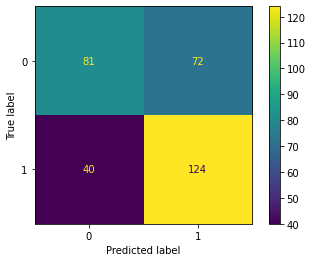

In [87]:
y_preds_grid9 = grid9.predict(X_test)
cm_grid9 = confusion_matrix(y_test, y_preds_grid9)
ConfusionMatrixDisplay(confusion_matrix=cm_grid9).plot();

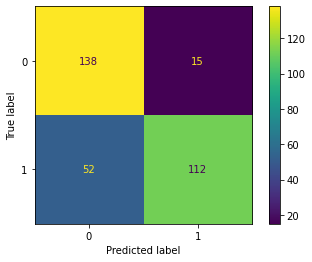

In [88]:
y_preds_grid10 = grid10.predict(X_test)
cm_grid10 = confusion_matrix(y_test, y_preds_grid10)
ConfusionMatrixDisplay(confusion_matrix=cm_grid10).plot();

In [89]:
# TfidVectorizer with Logistic Regression, NaiveBayes, and RandomForest
pipe11 = Pipeline([('tv', TfidfVectorizer()),('mb', MultinomialNB())])

pipe11_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid11 = GridSearchCV(pipe11,pipe11_params,cv=5)
grid11.fit(X_train, y_train)
print(f'TfidVectorizer+NaieveBayes:         {grid11.best_score_}')
print(f'Best params:{grid11.best_params_}')
print('')
# ==========================================================================
pipe12 = Pipeline([('tv', TfidfVectorizer()),('rf', RandomForestClassifier())])

pipe12_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid12 = GridSearchCV(pipe12,pipe12_params,cv=5)
grid12.fit(X_train, y_train)
print(f'TfidVectorizer+RandomForest:         {grid12.best_score_}')
print(f'Best params:{grid12.best_params_}')
print('')

TfidVectorizer+NaieveBayes:         0.6774703557312253
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 1), 'tv__stop_words': None}

TfidVectorizer+RandomForest:         0.7976284584980238
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 2), 'tv__stop_words': 'english'}



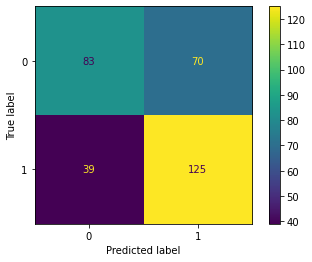

In [90]:
y_preds_grid11 = grid11.predict(X_test)
cm_grid11 = confusion_matrix(y_test, y_preds_grid11)
ConfusionMatrixDisplay(confusion_matrix=cm_grid11).plot();

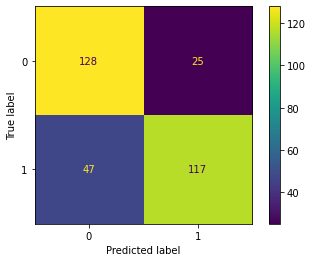

In [91]:
y_preds_grid12 = grid12.predict(X_test)
cm_grid12 = confusion_matrix(y_test, y_preds_grid12)
ConfusionMatrixDisplay(confusion_matrix=cm_grid12).plot();

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
cvec = CountVectorizer()
X_train = cvec.fit_transform(X_train)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train

In [ ]:
X_train = X_train.todense()

In [ ]:
X_train

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df_scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_scores